# Ozone Layer Detection

In this notebook, we use four methods to analyze the [Ozone Level Detection dataset, obtained from UCI](https://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection).



*   Support Vector Machine
*   Logistic Regression
*   K-Nearest Neighbour
*   Multilayer Perceptron Feed-Forward Network



## Setting the environment

In [222]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import plot_model

from collections import defaultdict
import scipy.stats as stats
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from collections import Counter
import matplotlib.pyplot as plt


In [223]:
df = pd.read_csv('eighthr.csv')

In [224]:
print(df.shape)
df.head()

(2534, 74)


,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0


In [225]:
df.columns

Index(['Date', 'WSR0', 'WSR1', 'WSR2', 'WSR3', 'WSR4', 'WSR5', 'WSR6', 'WSR7',
       'WSR8', 'WSR9', 'WSR10', 'WSR11', 'WSR12', 'WSR13', 'WSR14', 'WSR15',
       'WSR16', 'WSR17', 'WSR18', 'WSR19', 'WSR20', 'WSR21', 'WSR22', 'WSR23',
       'WSR_PK', 'WSR_AV', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7',
       'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17',
       'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T_PK', 'T_AV', 'T85', 'RH85',
       'U85', 'V85', 'HT85', 'T70', 'RH70', 'U70', 'V70', 'HT70', 'T50',
       'RH50', 'U50', 'V50', 'HT50', 'KI', 'TT', 'SLP', 'SLP_', 'Precp',
       'Result'],
      dtype='object')

In [226]:
df.describe()

,Result
count,2534.000000
mean,0.063141
std,0.243265
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [227]:
s = pd.Series(list('Result'))

'?' in s.values

False

In [228]:
df.drop(columns='Date', inplace=True)
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,?,?,?,?,?,?,?,?,0.58,0


In [229]:
df.replace(to_replace='?', value=np.nan, inplace=True)
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0


In [230]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [231]:
df = pd.DataFrame(imputer.fit_transform(df), dtype='float64')
df.columns = ['WSR0','WSR1','WSR2','WSR3','WSR4','WSR5','WSR6','WSR7','WSR8','WSR9','WSR10','WSR11','WSR12','WSR13','WSR14','WSR15','WSR16','WSR17','WSR18','WSR19','WSR20','WSR21','WSR22','WSR23','WSR_PK','WSR_AV','T0','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16','T17','T18','T19','T20','T21','T22','T23','T_PK','T_AV','T85','RH85','U85','V85','HT85','T70','RH70','U70','V70','HT70','T50','RH50','U50','V50','HT50','KI','TT','SLP','SLP_','Precp','Result']
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.150000,10.670000,-1.560000,5795.000000,-12.100000,17.900000,10330.000000,-55.000000,0.00,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.480000,8.390000,3.840000,5805.000000,14.050000,29.000000,10275.000000,-55.000000,0.00,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.600000,6.940000,9.800000,5790.000000,17.900000,41.300000,10235.000000,-40.000000,0.00,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.490000,8.730000,10.540000,5775.000000,31.150000,51.700000,10195.000000,-40.000000,2.08,0.0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10164.198442,-0.119949,0.58,0.0


normal_day 2374
Ozone_day 160


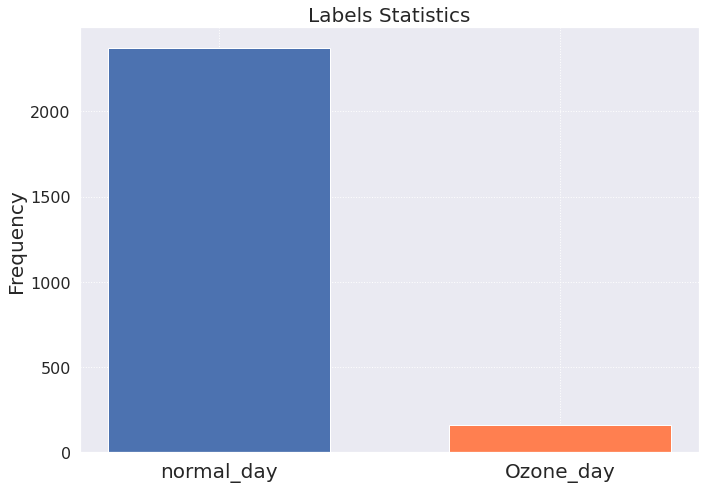

In [232]:
counter = Counter(df['Result'].tolist() )

map_category={ 1.0: "Ozone_day", 0.0: "normal_day"}

lb_counter={}
for k,v in counter.items():
     lb_counter[map_category[k]]=v
        
     print(map_category[k],v)   

height=[]
for l in lb_counter:
      height.append(lb_counter[l])  
        
    
fig = plt.figure()
bars = tuple(lb_counter)
x_pos = [0.3, 0.5]

plt.bar(x_pos, height, color=['b', 'coral'], width=0.13)
plt.xticks(x_pos, bars)
plt.title('Labels Statistics', fontsize=20)
plt.ylabel('Frequency', fontsize=20)


plt.xticks(x_pos, bars,fontsize=20)
plt.yticks(fontsize=16)
fig.set_size_inches(10, 7)
plt.grid(visible=True, linestyle=':')
fig.tight_layout()
fig.savefig('class_labels.png')


In [233]:
# Splitting the dataset into feature(X) and target(Y)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [234]:
# check if NaN values exist
if np.nan in df['T_PK'].values.tolist():
  print("NaN values found")
else:
  print("No NaN values found")

No NaN values found


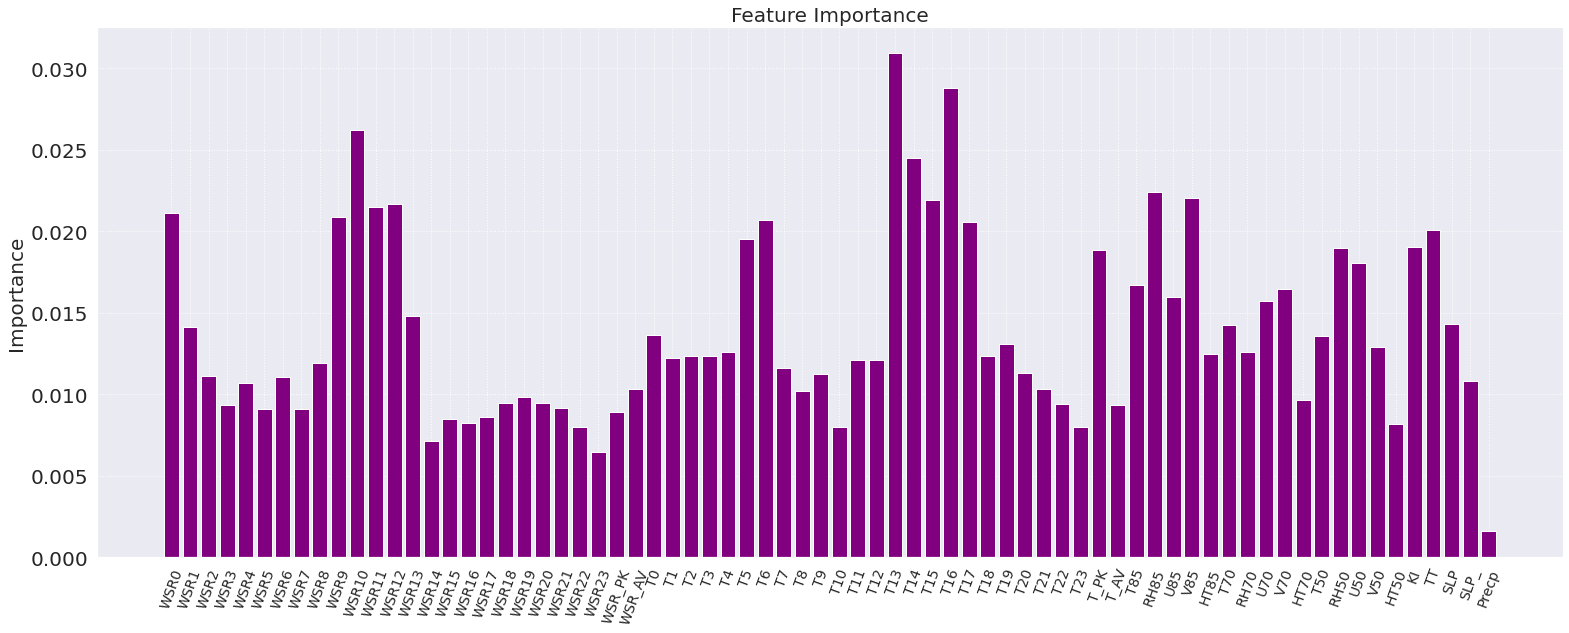

In [262]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance

importance = model.feature_importances_

cols = ['WSR0','WSR1','WSR2','WSR3','WSR4','WSR5','WSR6','WSR7','WSR8','WSR9','WSR10','WSR11','WSR12','WSR13','WSR14','WSR15','WSR16','WSR17','WSR18','WSR19','WSR20','WSR21','WSR22','WSR23','WSR_PK','WSR_AV','T0','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16','T17','T18','T19','T20','T21','T22','T23','T_PK','T_AV','T85','RH85','U85','V85','HT85','T70','RH70','U70','V70','HT70','T50','RH50','U50','V50','HT50','KI','TT','SLP','SLP_','Precp']

# summarize feature importance
#for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


    
fig = plt.figure()
bars = tuple(cols)
#x_pos = [0.3, 0.5]

plt.bar(cols, importance, color='purple')
plt.xticks(cols, bars)
plt.title('Feature Importance', fontsize=20)
plt.ylabel( 'Importance', fontsize=20)


plt.xticks(cols, bars,fontsize=14)
plt.xticks(rotation=70)

plt.yticks(fontsize=20)
fig.set_size_inches(22, 9)
plt.grid(visible=True, linestyle=':')
fig.tight_layout()
fig.savefig('class_labels.png')

#plt.bar([x for x in range(len(importance))], importance)
#plt.show()




In [235]:
# Cleaning data using Imputer Class
X = imputer.fit_transform(X)

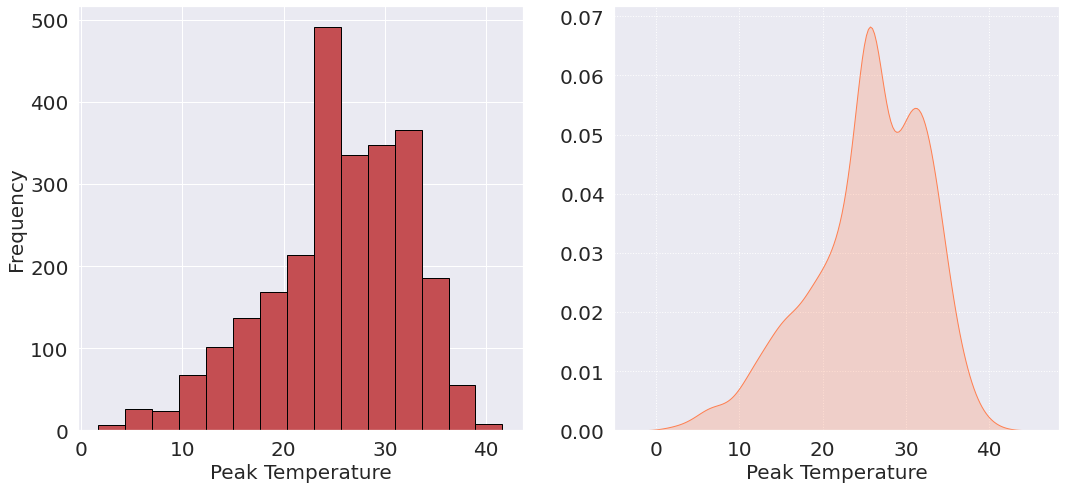

In [281]:
fig = plt.figure()
#title = fig.suptitle("Peak Temperature Distribution", fontsize=20)
fig.subplots_adjust(top=0.85, wspace=0.3)



# Histogram
ax = fig.add_subplot(1,2, 1)
ax.set_xlabel("Peak Temperature", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20) 
#ax.text(1.2, 800, r'$\mu$='+str(round(df['T_PK'].mean(),2)),  fontsize=15)
freq, bins, patches = ax.hist(df['T_PK'], color='r', bins=15,
                                    edgecolor='black', linewidth=1)
plt.tick_params(axis='both',labelsize=20)

# Density Plot
ax1 = fig.add_subplot(1,2, 2)
ax1.set_xlabel("Peak Temperature", fontsize=20)
ax1.set_ylabel(" ", fontsize=20) 
sns.kdeplot(df['T_PK'], ax=ax1, shade=True, color='coral')
plt.tick_params(axis='both',labelsize=20)
plt.grid(visible=True,linestyle=':')
fig.set_size_inches(15, 7)
fig.tight_layout()

fig.savefig('T_PK.png')


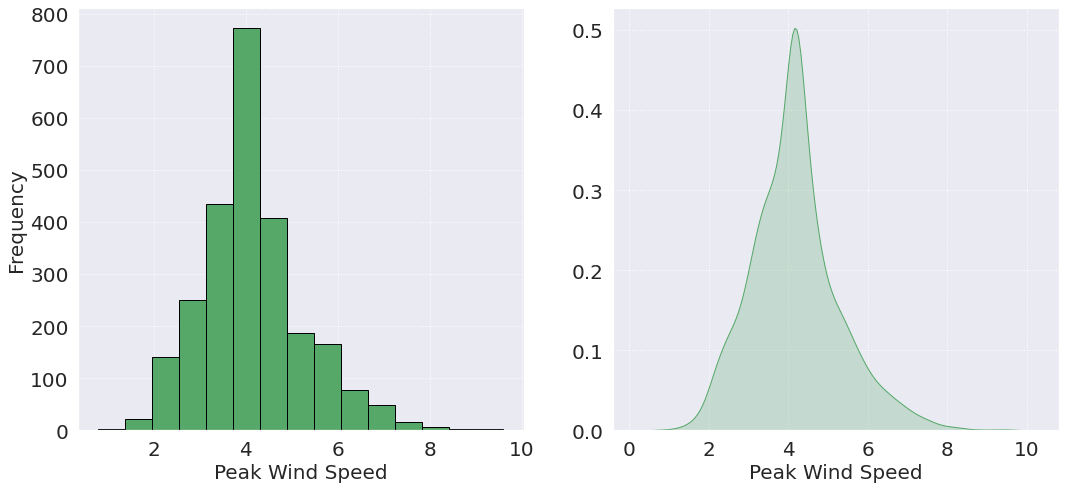

In [280]:
fig = plt.figure()
#title = fig.suptitle("Peak Wind Speed Distribution", fontsize=20)
fig.subplots_adjust(top=0.85, wspace=0.3)

# Histogram
ax = fig.add_subplot(1,2, 1)
ax.set_xlabel("Peak Wind Speed", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20) 
#ax.text(1.2, 800, r'$\mu$='+str(round(df['WSR_PK'].mean(),2)), fontsize=12)
freq, bins, patches = ax.hist(df['WSR_PK'], color='g', bins=15, edgecolor='black', linewidth=1)
plt.tick_params(axis='both',labelsize=20)
plt.grid(visible=True, linestyle=':')
# Density Plot
ax1 = fig.add_subplot(1,2, 2)
ax1.set_xlabel("Peak Wind Speed", fontsize=20)
ax1.set_ylabel(" ", fontsize=20) 
sns.kdeplot(df['WSR_PK'], ax=ax1, shade=True, color='g')
plt.tick_params(axis='both',labelsize=20)
plt.grid(linestyle=':')
fig.set_size_inches(15, 7)
fig.set_tight_layout('tight')
fig.savefig('WSR_PK.png')

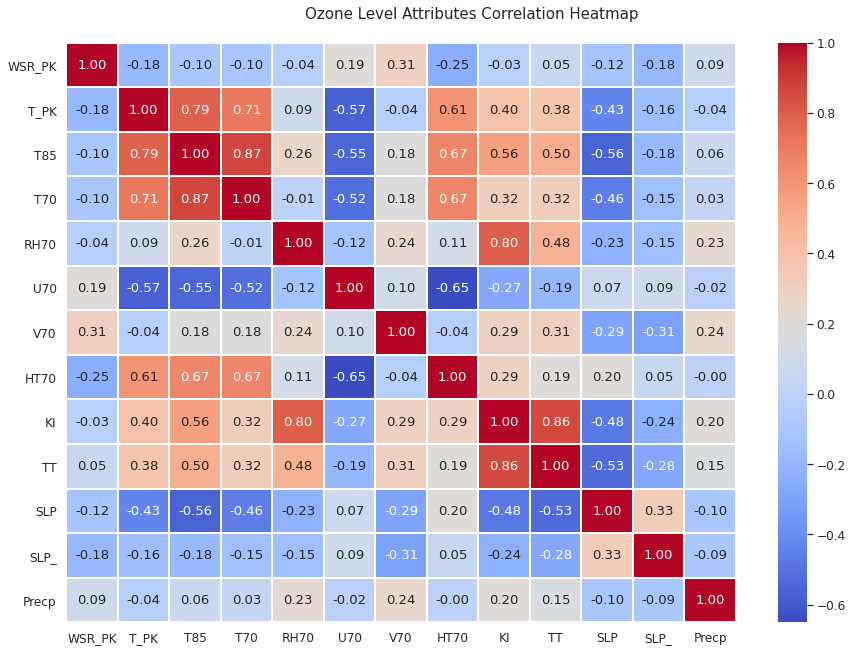

In [198]:
# Correlation Matrix Heatmap
fig, ax = plt.subplots(figsize=(15, 10))
subset_attributes = ['WSR_PK','T_PK','T85','T70','RH70','U70','V70','HT70','KI','TT','SLP','SLP_','Precp']
corr = df[subset_attributes].corr()
sns.set(font_scale=1.1)

hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
fig.subplots_adjust(top=0.93)


t= fig.suptitle('Ozone Level Attributes Correlation Heatmap', fontsize=15)

fig.savefig('Heatmap.png')

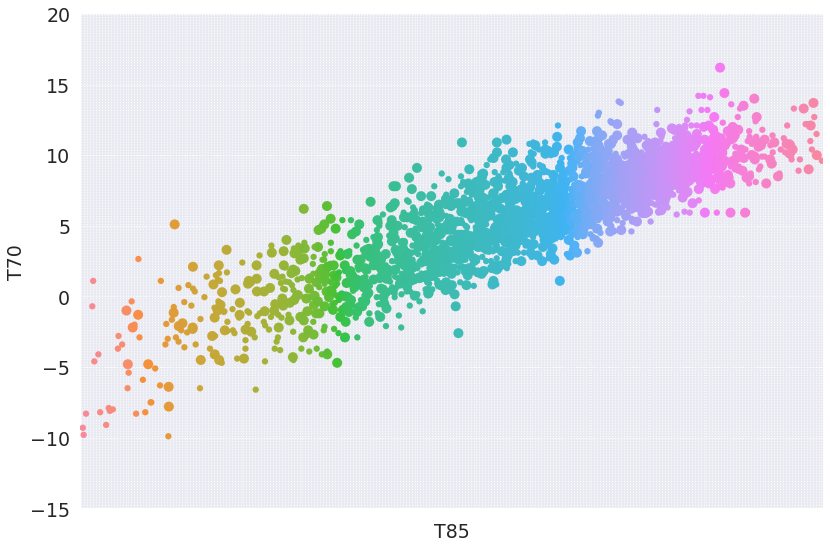

In [309]:


g=sns.catplot( x='T85', y='T70', data = df, jitter = '0.8', aspect=0.6, sizes=(40, 100), alpha=.99)

g.set_xticklabels('',fontsize=19)
#g.set_titles("{Correlation Temperature and Result}",fontsize=20)
g.set_yticklabels(fontsize=19)

g.set_ylabels('T70',fontsize=19)
g.set_xlabels('T85',fontsize=19)

plt.grid(visible=True, linestyle=':')
g.fig.set_size_inches(16,8)

g.savefig('corr.png') 

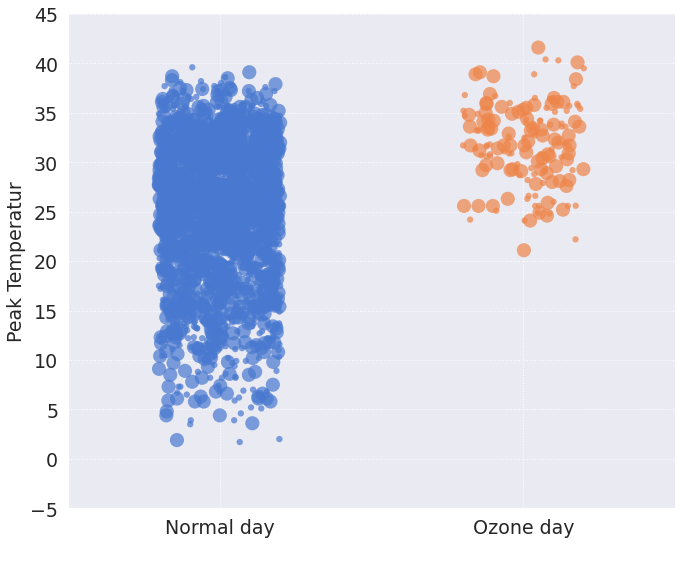

In [279]:

df['ozone_label'] = df['Result'].apply(lambda value: 'Normal Day' if value == 0 else 'Ozone Day')
df['ozone_label'] = pd.Categorical(df['ozone_label'], categories=['Normal Day', 'Ozone Day'])

#Visualizing 3-D categorical data using bar plots
# leveraging the concepts of hue and facets

#sns.reset_orig()

#sns.set(rc={'figure.figsize':(15,9),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

#res = sns.catplot(x="T_PK", hue="Result", col="ozone_label", data=df,kind="swarm" )


x_pos = [ "Normal day", "Ozone day"]

g=sns.catplot( x='Result', y='T_PK', data = df, jitter = '0.2', aspect=0.5, sizes=(40, 200), alpha=.7, 
              palette="muted", color='r')

g.set_xticklabels(x_pos, bars,fontsize=19)
#g.set_titles("{Correlation Temperature and Result}",fontsize=20)
g.set_yticklabels(fontsize=19)

g.set_ylabels('Peak Temperatur',fontsize=19)
g.set_xlabels(' ',fontsize=19)

plt.grid(visible=True, linestyle=':')
g.fig.set_size_inches(12,8)

g.savefig('temp_co.png') 


    


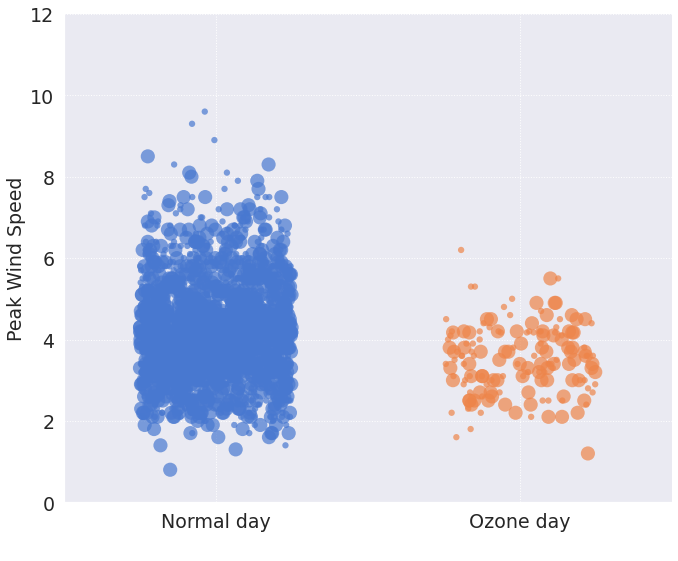

In [283]:
x_pos = [ "Normal day", "Ozone day"]
g=sns.catplot( x='Result', y='WSR_PK',
            data = df,
            jitter = '0.25', aspect=0.5, sizes=(40, 200), alpha=.7,  palette="muted")

g.set_xticklabels(x_pos, fontsize=19)

g.set_yticklabels(fontsize=19)

g.set_ylabels('Peak Wind Speed',fontsize=19)
g.set_xlabels(' ',fontsize=19)

plt.grid(visible=True, linestyle=':')
g.fig.set_size_inches(12,8)

g.savefig('wind_co.png') 

# Classification

In [207]:
sc = StandardScaler()

X_train = sc.fit_transform(X)


In [208]:

def evaluate_model(X, y, model):
    
   cval = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

   acc_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cval, n_jobs=-1)
   f_scores= cross_val_score(model, X, y, scoring='f1_micro', cv=cval, n_jobs=-1)

   auc_vals= cross_val_score(model, X, y, scoring='roc_auc', cv=cval, n_jobs=-1)
   


   return acc_scores,f_scores, auc_vals

def clf_models():
    
    models, names = list(), list()
    
    models.append(DummyClassifier(strategy='uniform'))
    names.append('DuM')
    
    models.append(LogisticRegression())
    names.append('LR ')
    
    
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    
    models.append(MLPClassifier(random_state=1, max_iter=300))
    names.append('NN ')
    
    models.append(KNeighborsClassifier())
    names.append('KNN')
    
    
    models.append(LinearSVC())
    names.append('SVM')
    
    return models, names


models, names = clf_models()

acc_values=[]
f_values=[]
auc_values=[]

for i in range(len(names)):
   steps = [('o', SMOTE(k_neighbors=2)), ('m', models[i])]
    
   pipeline = Pipeline(steps=steps)
    
   acc_scores ,f_scores, auc_vals = evaluate_model(X ,y, pipeline)

   f_values.append(f_scores)
    
   acc_values.append(acc_scores) 
    
   auc_values.append(auc_vals) 


   print('==> %s  Accuracy: %.4f (std %.4f)   F1 Micro: %.4f (std %.4f)   AUC: %.4f (std %.4f)' %
         (names[i], mean(acc_scores), std(acc_scores),   mean(f_scores), std(f_scores),
         mean(auc_vals), std(auc_vals)))
   
  

==> DuM  Accuracy: 0.5066 (std 0.0214)   F1 Micro: 0.5033 (std 0.0142)   AUC: 0.5000 (std 0.0000)
==> LR   Accuracy: 0.8115 (std 0.0228)   F1 Micro: 0.8066 (std 0.0170)   AUC: 0.8959 (std 0.0200)
==> LDA  Accuracy: 0.8107 (std 0.0151)   F1 Micro: 0.8091 (std 0.0156)   AUC: 0.9017 (std 0.0207)
==> NN   Accuracy: 0.7639 (std 0.1611)   F1 Micro: 0.7725 (std 0.1408)   AUC: 0.8918 (std 0.0206)
==> KNN  Accuracy: 0.8035 (std 0.0201)   F1 Micro: 0.8028 (std 0.0185)   AUC: 0.7187 (std 0.0374)
==> SVM  Accuracy: 0.7363 (std 0.1666)   F1 Micro: 0.6162 (std 0.2216)   AUC: 0.8833 (std 0.0207)


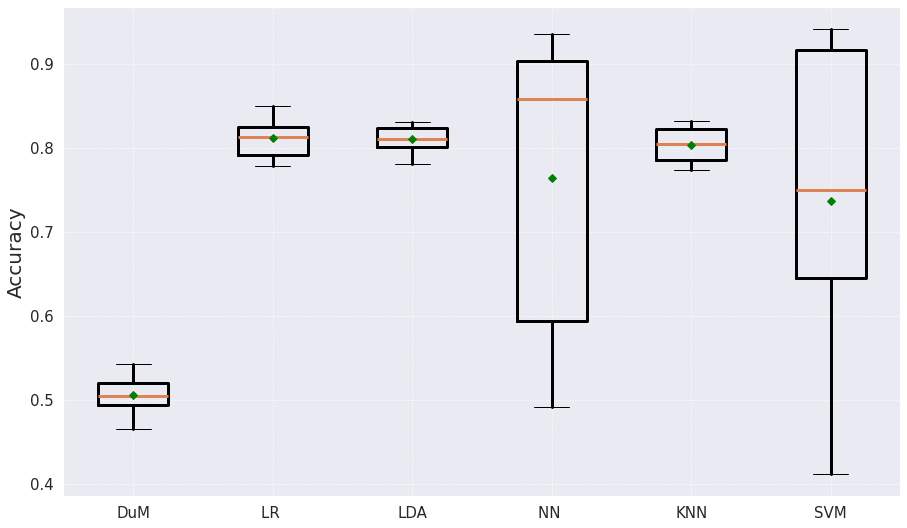

In [296]:
fig = plt.figure()
fig.set_size_inches(15, 9)
plt.ylabel('Accuracy', fontsize=20)

medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
whiskerprops = dict(linewidth=3, color='black')

meanpointprops = dict(marker='D', markeredgecolor='green',
                      markerfacecolor='green')

plt.boxplot(acc_values, labels=names, showmeans=True, whiskerprops=whiskerprops, boxprops=whiskerprops,
             meanprops=meanpointprops,
            medianprops={"linewidth": 3,  "solid_capstyle": "butt"})


plt.grid(visible=True, linestyle=':')
plt.tick_params(axis='both',labelsize=15)
fig.savefig('boxplt_acc.png')

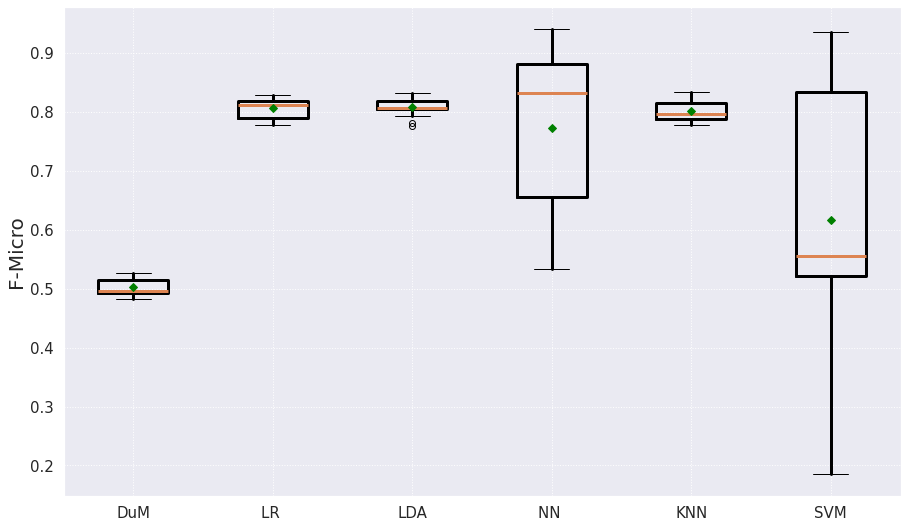

In [299]:
fig = plt.figure()
fig.set_size_inches(15, 9)
plt.ylabel('F-Micro', fontsize=20)

medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
whiskerprops = dict(linewidth=3, color='black')

meanpointprops = dict(marker='D', markeredgecolor='green',
                      markerfacecolor='green')

plt.boxplot(f_values, labels=names, showmeans=True, whiskerprops=whiskerprops, boxprops=whiskerprops,
             meanprops=meanpointprops,
            medianprops={"linewidth": 3,  "solid_capstyle": "butt"})


plt.grid(visible=True,linestyle=':')
plt.tick_params(axis='both',labelsize=15)
fig.savefig('boxplt_F.png')


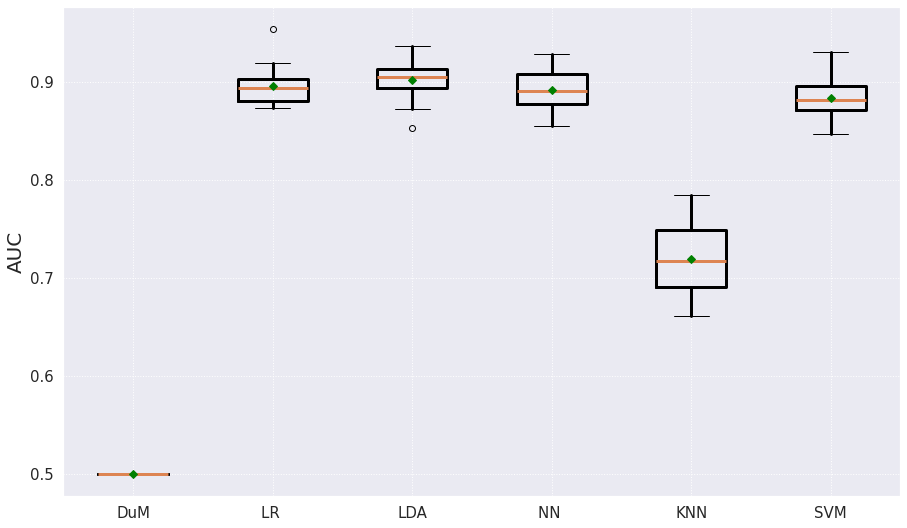

In [298]:
fig = plt.figure()
fig.set_size_inches(15, 9)
plt.ylabel('AUC', fontsize=20)

medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
whiskerprops = dict(linewidth=3, color='black')

meanpointprops = dict(marker='D', markeredgecolor='green',
                      markerfacecolor='green')

plt.boxplot(auc_values, labels=names, showmeans=True, whiskerprops=whiskerprops, boxprops=whiskerprops,
             meanprops=meanpointprops,
            medianprops={"linewidth": 3,  "solid_capstyle": "butt"})


plt.grid(visible=True, linestyle=':')
plt.tick_params(axis='both',labelsize=15)
fig.savefig('boxplt_auc.png')

In [212]:

X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.3, random_state=9)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)


In [213]:
# Initializer that generates tensors with a normal distribution
initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42)

# Define model
model = Sequential()
model.add(Dense(100, kernel_initializer=initializer, input_dim=72, activation= "relu"))
model.add(BatchNormalization())
model.add(Dense(50, kernel_initializer=initializer, activation= "relu"))
model.add(BatchNormalization())
model.add(Dense(1, kernel_initializer=initializer, activation= "sigmoid"))

# Print model Summary
model.summary() 
# Set up the optimizer


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 100)               7300      
_________________________________________________________________
batch_normalization_20 (Batc (None, 100)               400       
_________________________________________________________________
dense_31 (Dense)             (None, 50)                5050      
_________________________________________________________________
batch_normalization_21 (Batc (None, 50)                200       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 51        
Total params: 13,001
Trainable params: 12,701
Non-trainable params: 300
_________________________________________________________________


In [151]:
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
model.compile(loss="binary_crossentropy" , optimizer=adam, metrics=["accuracy"])
# Fit Model
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
89/89 [==============================] - 1s 4ms/step - loss: 0.6253 - accuracy: 0.7073 - val_loss: 0.5463 - val_accuracy: 0.9380
Epoch 2/10
89/89 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.8956 - val_loss: 0.2835 - val_accuracy: 0.9408
Epoch 3/10
89/89 [==============================] - 0s 3ms/step - loss: 0.2351 - accuracy: 0.9351 - val_loss: 0.1798 - val_accuracy: 0.9465
Epoch 4/10
89/89 [==============================] - 0s 3ms/step - loss: 0.1694 - accuracy: 0.9485 - val_loss: 0.1474 - val_accuracy: 0.9549
Epoch 5/10
89/89 [==============================] - 0s 3ms/step - loss: 0.1438 - accuracy: 0.9513 - val_loss: 0.1297 - val_accuracy: 0.9577
Epoch 6/10
89/89 [==============================] - 0s 3ms/step - loss: 0.1254 - accuracy: 0.9549 - val_loss: 0.1218 - val_accuracy: 0.9549
Epoch 7/10
89/89 [==============================] - 0s 4ms/step - loss: 0.1115 - accuracy: 0.9528 - val_loss: 0.1721 - val_accuracy: 0.9465
Epoch 8/10
89/89 [==

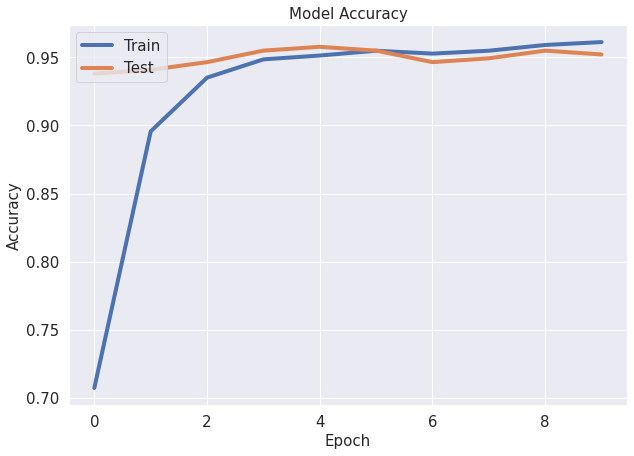

In [176]:

# Plot training & validation accuracy values

fig = plt.figure()
fig.set_size_inches(10, 7)
plt.plot(history.history['accuracy'], linewidth=4)
plt.plot(history.history['val_accuracy'], linewidth=4)
plt.title('Model Accuracy', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.legend(['Train', 'Test'], loc='upper left', fontsize=15)
plt.tick_params(axis='both',labelsize=15)


#fig.savefig('temp.png')




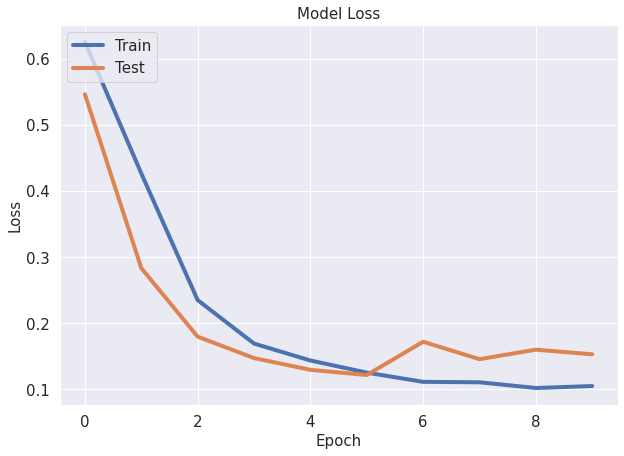

In [162]:
fig = plt.figure()
fig.set_size_inches(10, 7)

# Plot training & validation loss values
plt.plot(history.history['loss'], linewidth=4)
plt.plot(history.history['val_loss'], linewidth=4)
plt.title('Model Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.legend(['Train', 'Test'], loc='upper left', fontsize=15)


plt.tick_params(axis='both',labelsize=15)

#fig.savefig('temp.png')

In [157]:
from sklearn.metrics import mean_squared_error

pred = model.predict(X_test)
score = np.sqrt(mean_squared_error(Y_test, pred))
print (score)

0.21851946555090684


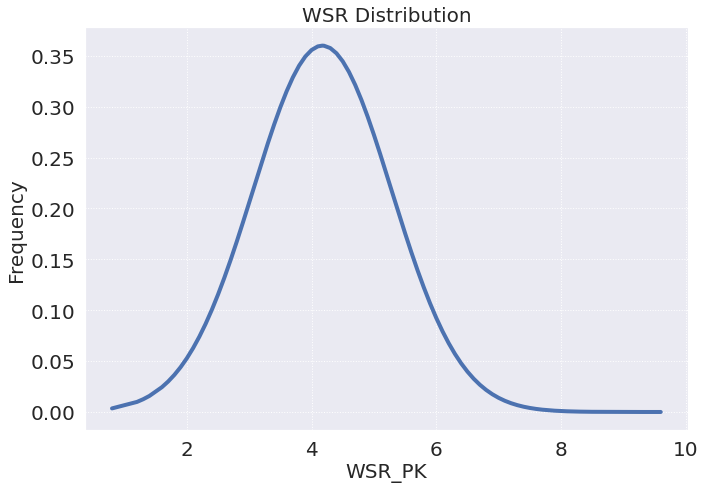

In [163]:
fig = plt.figure()
fig.set_size_inches(10, 7)

#fig, ax = plt.subplots()
#fig.set_size_inches(10, 7)

los_speed=df['WSR_PK'].tolist()

los_speed.sort()
hmean = np.mean(los_speed)
hstd = np.std(los_speed)
pdf = stats.norm.pdf(los_speed, hmean, hstd)
plt.plot(los_speed, pdf, color= 'b', linewidth=4)

plt.xlabel('WSR_PK', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('WSR Distribution', fontsize=20)

plt.grid(linestyle=':')
plt.tick_params(axis='both',labelsize=20)
fig.tight_layout()

#plt.show() 

#plt.savefig('wind.png', bbox_inches='tight')

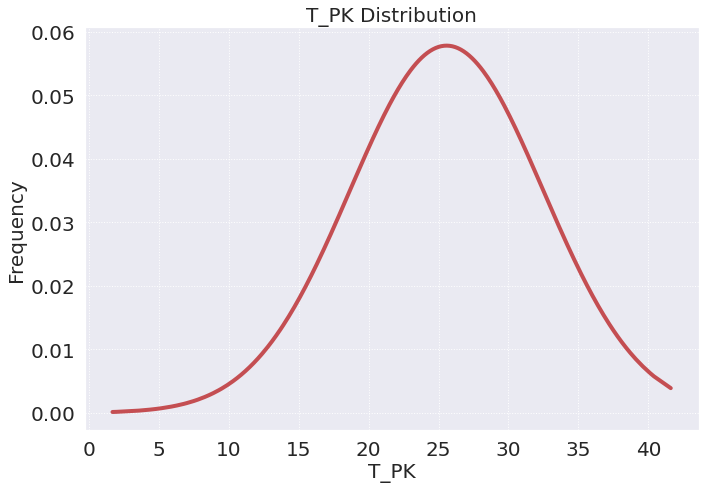

In [160]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)


ax.grid(True)
ax.grid(linestyle=':')

los_speed=df['T_PK'].tolist()

los_speed.sort()
hmean = np.mean(los_speed)
hstd = np.std(los_speed)
pdf = stats.norm.pdf(los_speed, hmean, hstd)
plt.plot(los_speed, pdf, color= 'r', linewidth=4)

plt.xlabel('T_PK', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('T_PK Distribution', fontsize=20)

plt.grid(linestyle=':')
plt.tick_params(axis='both',labelsize=20)
fig.tight_layout()

#plt.show() 

#plt.savefig('los_speed.png', bbox_inches='tight')




In [ ]:

#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
#plt.plot(range(1,50),scoreL)
#plt.xlabel("value of k")
#plt.ylabel("testing accuracy")